# Time Domain Spectral Simulations

Demonstrate how to inspect simulated spectra produced using `quicktransients`.

In [1]:
import numpy as np

from astropy.io import fits
from astropy.table import Table, Column

from desispec.io.spectra import read_spectra

import matplotlib.pyplot as plt

## Input Files

The `quicktransients` program in the [desisim transients branch](https://github.com/desihub/desisim) will produce two FITS outputs:
1. A truth file with information about the templates used for each object.
2. A spect file with the templates "observed" under conditions specified by the user.

The spectra can then be coadded using the `desi_coadd_spectra` program available in [desispec](https://github.com/desihub/desispec).

In [2]:
truth_file = '../../lrg_2020-03-08_1000s_001_truth.fits'
spect_file = '../../lrg_2020-03-08_1000s_001_spect.fits'
coadd_file = '../../lrg_2020-03-08_1000s_001_coadd.fits'

### Contents of the Truth File

The truth file has the following tables:
1. A wavelength table called `WAVE`.
1. A flux table called `FLUX`.
1. A `TARGETS` table simulating a target list available in data.
1. A simulation `TRUTH` table with information about the object (redshift, flux, etc.).
1. A simulation `OBJTRUTH` table with line fluxes and other data generated for each object.

In [3]:
hdus = fits.open(truth_file)
hdus.info()

Filename: ../../lrg_2020-03-08_1000s_001_truth.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  WAVE          1 PrimaryHDU       8   (32001,)   float64   
  1  FLUX          1 ImageHDU         9   (32001, 100)   float32   
  2  TARGETS       1 BinTableHDU    235   100R x 99C   [I, J, 8A, J, 4A, D, D, E, E, 5E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, I, I, E, E, E, E, E, E, E, E, E, E, E, E, B, B, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 2A, K, E, E, E, E, E, E, E, E, K, E, L, E, E, E, E, E, E, I, E, 1A, K, K, K]   
  3  TRUTH         1 BinTableHDU     51   100R x 17C   [K, K, E, 10A, 10A, 10A, J, K, E, 15A, E, E, E, E, E, E, E]   
  4  OBJTRUTH      1 BinTableHDU     44   100R x 13C   [K, E, E, E, E, E, E, E, E, E, E, E, E]   


In [4]:
wave = hdus['WAVE'].data
flux = hdus['FLUX'].data
targets = Table.read(truth_file, 'TARGETS')
truth = Table.read(truth_file, 'TRUTH')
objtr = Table.read(truth_file, 'OBJTRUTH')

In [5]:
truth

TARGETID,MOCKID,TRUEZ,TRUESPECTYPE,TEMPLATETYPE,TEMPLATESUBTYPE,TEMPLATEID,SEED,MAG,MAGFILTER,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_W3,FLUX_W4
,,,,,,,,mag,,nanomaggies,nanomaggies,nanomaggies,nanomaggies,nanomaggies,nanomaggies,nanomaggies
int64,int64,float32,str10,str10,str10,int32,int64,float32,str15,float32,float32,float32,float32,float32,float32,float32
183220001,963749,0.6661388,GALAXY,LRG,,849,910128206,19.012602,decam2014-z,3.0067465,10.70945,24.829002,48.148636,28.6202,0.0,0.0
183220002,956816,0.469352,GALAXY,LRG,,173,9079057,19.65123,decam2014-z,5.786176,11.754405,13.788216,20.53447,13.944742,0.0,0.0
183220003,949957,0.57316816,GALAXY,LRG,,1103,879768527,18.733837,decam2014-z,4.31671,16.532488,32.097054,71.26469,46.910007,0.0,0.0
183220004,947740,0.65243596,GALAXY,LRG,,2935,1165684419,19.341675,decam2014-z,3.737926,12.224621,18.337076,36.518097,21.242699,0.0,0.0
183220005,961408,0.5398787,GALAXY,LRG,,1618,704420844,18.860033,decam2014-z,3.123877,15.532507,28.575035,39.547943,23.518024,0.0,0.0
183220006,960242,0.55430186,GALAXY,LRG,,2457,381956379,19.114994,decam2014-z,2.1737187,10.822878,22.594482,35.55058,21.412283,0.0,0.0
183220007,954904,0.86859363,GALAXY,LRG,,1602,1733702428,18.277885,decam2014-z,3.6809509,14.595357,48.847893,85.87523,62.206352,0.0,0.0
183220008,955305,0.78949225,GALAXY,LRG,,1602,65420210,18.509287,decam2014-z,2.6636548,13.569909,39.471645,49.01248,33.772366,0.0,0.0


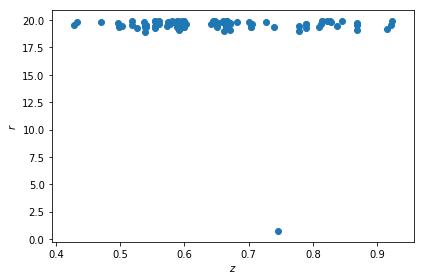

In [6]:
r = 22.5 - 2.5*np.log10(truth['FLUX_R'])
z = truth['TRUEZ']

fig, ax = plt.subplots(1,1, figsize=(6,4))
ax.scatter(z, r)
ax.set(xlabel='$z$', ylabel='$r$')
fig.tight_layout();

In [7]:
targets

RELEASE,BRICKID,BRICKNAME,OBJID,TYPE,RA,DEC,RA_IVAR,DEC_IVAR,DCHISQ [5],FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_W3,FLUX_W4,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,FLUX_IVAR_W3,FLUX_IVAR_W4,MW_TRANSMISSION_G,MW_TRANSMISSION_R,MW_TRANSMISSION_Z,MW_TRANSMISSION_W1,MW_TRANSMISSION_W2,MW_TRANSMISSION_W3,MW_TRANSMISSION_W4,NOBS_G,NOBS_R,NOBS_Z,FRACFLUX_G,FRACFLUX_R,FRACFLUX_Z,FRACMASKED_G,FRACMASKED_R,FRACMASKED_Z,FRACIN_G,FRACIN_R,FRACIN_Z,ALLMASK_G,ALLMASK_R,ALLMASK_Z,WISEMASK_W1,WISEMASK_W2,PSFDEPTH_G,PSFDEPTH_R,PSFDEPTH_Z,GALDEPTH_G,GALDEPTH_R,GALDEPTH_Z,FRACDEV,FRACDEV_IVAR,SHAPEDEV_R,SHAPEDEV_R_IVAR,SHAPEDEV_E1,SHAPEDEV_E1_IVAR,SHAPEDEV_E2,SHAPEDEV_E2_IVAR,SHAPEEXP_R,SHAPEEXP_R_IVAR,SHAPEEXP_E1,SHAPEEXP_E1_IVAR,SHAPEEXP_E2,SHAPEEXP_E2_IVAR,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,REF_CAT,REF_ID,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_G_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_BP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_RP_MEAN_MAG,GAIA_PHOT_RP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_BP_RP_EXCESS_FACTOR,GAIA_ASTROMETRIC_SIGMA5D_MAX,GAIA_ASTROMETRIC_PARAMS_SOLVED,GAIA_ASTROMETRIC_EXCESS_NOISE,GAIA_DUPLICATED_SOURCE,PARALLAX,PARALLAX_IVAR,PMRA,PMRA_IVAR,PMDEC,PMDEC_IVAR,MASKBITS,EBV,PHOTSYS,DESI_TARGET,BGS_TARGET,MWS_TARGET
,,,,,deg,deg,1 / deg2,1 / deg2,,nanomaggies,nanomaggies,nanomaggies,nanomaggies,nanomaggies,nanomaggies,nanomaggies,1/nanomaggies**2,1/nanomaggies**2,1/nanomaggies**2,1/nanomaggies**2,1/nanomaggies**2,1/nanomaggies**2,1/nanomaggies**2,,,,,,,,,,,,,,,,,,,,,,,,,1/nanomaggies**2,1/nanomaggies**2,1/nanomaggies**2,1/nanomaggies**2,1/nanomaggies**2,1/nanomaggies**2,,,arcsec,1 / arcsec2,,,,,arcsec,1 / arcsec2,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
int16,int32,str8,int32,str4,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,uint8,uint8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str2,int64,float32,float32,float32,float32,float32,float32,float32,float32,int64,float32,bool,float32,float32,float32,float32,float32,float32,int16,float32,str1,int64,int64,int64
9999,377842,0193p082,183220001,DEV,19.18861961364746,8.351959228515625,100000000.0,100000000.0,0.0 .. 400.0,2.491352,9.4069605,23.43826,47.05534,27.25614,0.0,0.0,1438.5999,329.56418,62.79716,0.7260983,0.28815907,0.0,0.0,0.82762146,0.8803395,0.9306454,0.9892269,0.99337006,0.9985823,0.99946445,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0,0,52.480747,7.7268057,1.8706821,57.543995,13.182568,2.5118864,1.0,0.0,0.91578335,8169.2017,0.11022405,21273546000000.0,0.10953808,7036.1357,0.0,0.0,0.0,0.0,0.0,0.0,0.7005878,2.7667441,7.250493,0.7005878,2.7667441,7.250493,,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,False,0.0,1.0,0.0,1.0,0.0,1.0,0,0.063914336,S,0,0,0
9999,374985,0190p077,183220002,DEV,19.05477523803711,7.853790760040283,100000000.0,100000000.0,0.0 .. 400.0,5.076597,10.7383995,13.142294,19.752245,16.721498,0.0,0.0,1438.5999,329.56418,62.79716,0.72609663,0.28815845,0.0,0.0,0.8742341,0.913439,0.9502204,0.9923348,0.9952856,0.9989927,0.99961954,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0,0,52.480747,7.7268057,1.8706821,57.543995,13.182568,2.5118864,1.0,0.0,1.9170008,1074.2612,0.27201194,469080570000.0,0.41286722,4378.069,0.0,0.0,0.0,0.0,0.0,0.0,0.87605333,1.9291763,2.4708815,0.87605333,1.9291763,2.4708815,,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,False,0.0,1.0,0.0,1.0,0.0,1.0,0,0.045404688,S,0,0,0
9999,379266,0188p085,183220003,DEV,18.91654396057129,8.404616355895996,100000000.0,100000000.0,0.0 .. 400.0,3.491266,14.385083,29.709438,69.061775,49.557903,0.0,0.0,1438.5999,329.56418,62.79

In [8]:
objtr

TARGETID,OIIFLUX,HBETAFLUX,EWOII,EWHBETA,D4000,VDISP,OIIDOUBLET,OIIIHBETA,OIIHBETA,NIIHBETA,SIIHBETA,TRUEZ_NORSD
,erg / (cm2 s),erg / (cm2 s),Angstrom,Angstrom,,km / s,,Dex,Dex,Dex,Dex,
int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
183220001,-1.0,-1.0,-1.0,-1.0,1.4469656,257.69434,-1.0,-1.0,-1.0,-1.0,-1.0,0.66231346
183220002,-1.0,-1.0,-1.0,-1.0,1.5964067,171.36572,-1.0,-1.0,-1.0,-1.0,-1.0,0.4692749
183220003,-1.0,-1.0,-1.0,-1.0,1.6904867,156.36108,-1.0,-1.0,-1.0,-1.0,-1.0,0.57078016
183220004,-1.0,-1.0,-1.0,-1.0,1.6856736,171.36572,-1.0,-1.0,-1.0,-1.0,-1.0,0.65025336
183220005,-1.0,-1.0,-1.0,-1.0,1.7848588,171.36572,-1.0,-1.0,-1.0,-1.0,-1.0,0.53599286
183220006,-1.0,-1.0,-1.0,-1.0,1.6876178,171.36572,-1.0,-1.0,-1.0,-1.0,-1.0,0.55442154
183220007,-1.0,-1.0,-1.0,-1.0,1.2852792,157.4159,-1.0,-1.0,-1.0,-1.0,-1.0,0.86828893
183220008,-1.0,-1.0,-1.0,-1.0,1.2852792,157.4159,-1.0,-1.0,-1.0,-1.0,-1.0,0.78937477


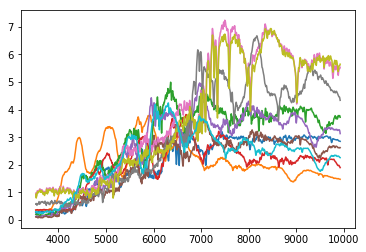

In [9]:
for i in range(10):
    plt.plot(wave, flux[i])

### Observed Spectra

The spectra generated under observing conditions are stored in a single file. A `FIBERMAP` table provides a summary of target data for each object, and individual wavelength, flux, variance, resolution, and mask tables are present for each camera.

The data are best accessed using the `read_spectra` function from [desispec](https://github.com/desihub/desispec), which packs everything into a single object.

In [10]:
spectra = read_spectra(spect_file)
hdus = fits.open(spect_file)
hdus.info()

Filename: ../../lrg_2020-03-08_1000s_001_spect.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      48   ()      
  1  FIBERMAP      1 BinTableHDU    164   100R x 76C   [K, K, K, K, K, D, D, D, D, K, K, 4A, J, D, K, E, E, E, E, E, I, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 1A, J, K, K, J, K, J, J, J, J, J, 3A, E, E, E, K, B, I, D, D, E, E, E, E, E, E, J, J, J, J, J]   
  2  B_WAVELENGTH    1 ImageHDU        10   (2380,)   float64   
  3  B_FLUX        1 ImageHDU        11   (2380, 100)   float32   
  4  B_IVAR        1 ImageHDU        11   (2380, 100)   float32   
  5  B_MASK        1 ImageHDU        12   (2380, 100)   int32 (rescales to uint32)   
  6  B_RESOLUTION    1 ImageHDU        11   (2380, 9, 100)   float32   
  7  R_WAVELENGTH    1 ImageHDU        10   (2116,)   float64   
  8  R_FLUX        1 ImageHDU        11   (2116, 100)   float32   
  9  R_IVAR        1 ImageHDU        11   (2116, 100)   

In [11]:
spectra.fibermap

TARGETID,DESI_TARGET,BGS_TARGET,MWS_TARGET,SECONDARY_TARGET,TARGET_RA,TARGET_DEC,TARGET_RA_IVAR,TARGET_DEC_IVAR,BRICKID,BRICK_OBJID,MORPHTYPE,PRIORITY,SUBPRIORITY,REF_ID,PMRA,PMDEC,REF_EPOCH,PMRA_IVAR,PMDEC_IVAR,RELEASE,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERFLUX_W1,FIBERFLUX_W2,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,FIBERTOTFLUX_W1,FIBERTOTFLUX_W2,MW_TRANSMISSION_G,MW_TRANSMISSION_R,MW_TRANSMISSION_Z,EBV,PHOTSYS,OBSCONDITIONS,NUMOBS_INIT,PRIORITY_INIT,NUMOBS_MORE,HPXPIXEL,FIBER,PETAL_LOC,DEVICE_LOC,LOCATION,FIBERSTATUS,OBJTYPE,LAMBDA_REF,FIBERASSIGN_X,FIBERASSIGN_Y,FA_TARGET,FA_TYPE,NUMTARGET,FIBER_RA,FIBER_DEC,FIBER_RA_IVAR,FIBER_DEC_IVAR,PLATEMAKER_X,PLATEMAKER_Y,PLATEMAKER_RA,PLATEMAKER_DEC,NUM_ITER,SPECTROID,NIGHT,EXPID,TILEID
int64,int64,int64,int64,int64,float64,float64,float64,float64,int64,int64,bytes4,int32,float64,int64,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes1,int32,int64,int64,int32,int64,int32,int32,int32,int32,int32,bytes3,float32,float32,float32,int64,uint8,int16,float64,float64,float32,float32,float32,float32,float32,float32,int32,int32,int32,int32,int32
183220001,1,0,0,0,19.18861961364746,8.351959228515625,0.0,0.0,377842,183220001,,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,2.491352,9.4069605,23.43826,47.05534,27.25614,1438.5999,329.56418,62.79716,0.7260983,0.28815907,0.7005878,2.7667441,7.250493,0.0,0.0,0.7005878,2.7667441,7.250493,0.0,0.0,0.82762146,0.8803395,0.9306454,0.063914336,S,0,0,0,0,0,0,0,311,311,0,,5400.0,83.21898,-286.66373,0,0,0,19.18861961364746,8.351959228515625,0.0,0.0,0.0,0.0,0.0,0.0,2,0,20200307,0,0
183220002,1,0,0,0,19.05477523803711,7.853790760040283,0.0,0.0,374985,183220002,,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,5.076597,10.7383995,13.142294,19.752245,16.721498,1438.5999,329.56418,62.79716,0.72609663,0.28815845,0.87605333,1.9291763,2.4708815,0.0,0.0,0.87605333,1.9291763,2.4708815,0.0,0.0,0.8742341,0.913439,0.9502204,0.045404688,S,0,0,0,0,0,1,0,272,272,0,,5400.0,59.109577,-273.27396,0,0,0,19.05477523803711,7.853790760040283,0.0,0.0,0.0,0.0,0.0,0.0,2,0,20200307,0,0
183220003,1,0,0,0,18.91654396057129,8.404616355895996,0.0,0.0,379266,183220003,,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,3.491266,14.385083,29.709438,69.061775,49.557903,1438.5999,329.56418,62.79716,0.726108,0.28816283,0.99433416,4.2856045,9.310624,0.0,0.0,0.99433416,4.2856045,9.310624,0.0,0.0,0.8143953,0.8708378,0.9249671,0.06935651,S,0,0,0,0,0,2,0,252,252,0,,5400.0,31.751867,-269.80435,0,0,0,18.91654396057129,8.404616355895996,0.0,0.0,0.0,0.0,0.0,0.0,2,0,20200307,0,0
183220004,1,0,0,0,18.868619918823242,7.903359889984131,0.0,0.0,376412,183220004,,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,3.1073112,10.874429,17.103752,38.379623,19.937765,1438.5999,329.56418,62.79716,0.7260934,0.2881572,0.34339783,1.2282563,1.9810051,0.0,0.0,0.34339783,1.2282563,1.9810051,0.0,0.0,0.8324913,0.8838255,0.932722,0.06193242,S,0,0,0,0,0,3,0,156,156,0,,5400.0,0.18432418,-221.17873,0,0,0,18.868619918823242,7.903359889984131,0.0,0.0,0.0,0.0,0.0,0.0,2,0,20200307,0,0
183220005,1,0,0,0,19.14378547668457,8.083988189697266,0.0,0.0,376413,183220005,,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,2.6403086,13.896034,26.72794,36.90129,22.282845,1438.5999,329.56418,62.79716,0.7260929,0.28815696,0.5936962,3.26072,6.5804887,0.0,0.0,0.5936962,3.26072,6.5804887,0.0,0.0,0.8410145,0.88991076,0.93633837,0.058491383,S,0,0,0,0,0,4,0,198,198,0,,5400.0,-19.776659,-253.03535,0,0,0,19.14378547668457,8.083988189697266,0.0,0.0,0.0,0.0,0.0,0.0,2,0,20200307,0,0
183220006,1,0,0,0,19.120784759521484,7.9965620040893555,0.0,0.0,376413,183220006,,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,1.9183356,9.909381,21.555494,36.963768,23.562414,1438.5999,329.56418,62.79716,0.72609353,0.28815722,0.4080428,2.1984336,5.014756,0.0,0.0,0.4080428,2.1984336,5.014756,0.

### Coadd Files

The coadds are generated using the `desi_coadd_spectra` program available in [desispec](https://github.com/desihub/desispec). For example, to add data across the cameras run

```
desi_coadd_spectra -i bgs_2020-03-08_0150s_001_spect.fits -o bgs_2020-03-08_0150s_001_coadd.fits --coadd-cameras
```

The data can then be accessed using the `read_spectra` function.

In [12]:
coadds = read_spectra(coadd_file)
hdus = fits.open(coadd_file)
hdus.info()

Filename: ../../lrg_2020-03-08_1000s_001_coadd.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   ()      
  1  FIBERMAP      1 BinTableHDU    196   100R x 92C   [K, K, K, K, K, D, D, D, D, K, K, 4A, J, D, K, E, E, E, E, E, I, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 1A, J, K, K, J, K, J, J, J, J, J, 3A, E, E, E, K, B, I, D, D, E, E, E, E, E, E, J, J, J, J, J, I, K, K, K, K, K, K, K, K, K, K, K, K, K, K, K]   
  2  BRZ_WAVELENGTH    1 ImageHDU        10   (6265,)   float64   
  3  BRZ_FLUX      1 ImageHDU        11   (6265, 100)   float32   
  4  BRZ_IVAR      1 ImageHDU        11   (6265, 100)   float32   
  5  BRZ_MASK      1 ImageHDU        12   (6265, 100)   int32 (rescales to uint32)   
  6  BRZ_RESOLUTION    1 ImageHDU        11   (6265, 11, 100)   float32   
  7  SCORES        1 BinTableHDU     30   100R x 9C   [D, D, D, D, D, D, D, D, D]   


In [13]:
coadds.fibermap

TARGETID,DESI_TARGET,BGS_TARGET,MWS_TARGET,SECONDARY_TARGET,TARGET_RA,TARGET_DEC,TARGET_RA_IVAR,TARGET_DEC_IVAR,BRICKID,BRICK_OBJID,MORPHTYPE,PRIORITY,SUBPRIORITY,REF_ID,PMRA,PMDEC,REF_EPOCH,PMRA_IVAR,PMDEC_IVAR,RELEASE,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERFLUX_W1,FIBERFLUX_W2,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,FIBERTOTFLUX_W1,FIBERTOTFLUX_W2,MW_TRANSMISSION_G,MW_TRANSMISSION_R,MW_TRANSMISSION_Z,EBV,PHOTSYS,OBSCONDITIONS,NUMOBS_INIT,PRIORITY_INIT,NUMOBS_MORE,HPXPIXEL,FIBER,PETAL_LOC,DEVICE_LOC,LOCATION,FIBERSTATUS,OBJTYPE,LAMBDA_REF,FIBERASSIGN_X,FIBERASSIGN_Y,FA_TARGET,FA_TYPE,NUMTARGET,FIBER_RA,FIBER_DEC,FIBER_RA_IVAR,FIBER_DEC_IVAR,PLATEMAKER_X,PLATEMAKER_Y,PLATEMAKER_RA,PLATEMAKER_DEC,NUM_ITER,SPECTROID,NIGHT,EXPID,TILEID,COADD_NUMEXP,FIRST_NIGHT,LAST_NIGHT,NUM_NIGHT,FIRST_EXPID,LAST_EXPID,NUM_EXPID,FIRST_TILEID,LAST_TILEID,NUM_TILEID,FIRST_SPECTROID,LAST_SPECTROID,NUM_SPECTROID,FIRST_FIBER,LAST_FIBER,NUM_FIBER
int64,int64,int64,int64,int64,float64,float64,float64,float64,int64,int64,bytes4,int32,float64,int64,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes1,int32,int64,int64,int32,int64,int32,int32,int32,int32,int32,bytes3,float32,float32,float32,int64,uint8,int16,float64,float64,float32,float32,float32,float32,float32,float32,int32,int32,int32,int32,int32,int16,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64
183220001,1,0,0,0,19.18861961364746,8.351959228515625,0.0,0.0,377842,183220001,,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,2.491352,9.4069605,23.43826,47.05534,27.25614,1438.5999,329.56418,62.79716,0.7260983,0.28815907,0.7005878,2.7667441,7.250493,0.0,0.0,0.7005878,2.7667441,7.250493,0.0,0.0,0.82762146,0.8803395,0.9306454,0.063914336,S,0,0,0,0,0,0,0,311,311,0,,5400.0,83.21898,-286.66373,0,0,0,19.18861961364746,8.351959228515625,0.0,0.0,0.0,0.0,0.0,0.0,2,0,20200307,0,0,1,20200307,20200307,1,0,0,1,0,0,1,0,0,1,0,0,1
183220002,1,0,0,0,19.05477523803711,7.853790760040283,0.0,0.0,374985,183220002,,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,5.076597,10.7383995,13.142294,19.752245,16.721498,1438.5999,329.56418,62.79716,0.72609663,0.28815845,0.87605333,1.9291763,2.4708815,0.0,0.0,0.87605333,1.9291763,2.4708815,0.0,0.0,0.8742341,0.913439,0.9502204,0.045404688,S,0,0,0,0,0,1,0,272,272,0,,5400.0,59.109577,-273.27396,0,0,0,19.05477523803711,7.853790760040283,0.0,0.0,0.0,0.0,0.0,0.0,2,0,20200307,0,0,1,20200307,20200307,1,0,0,1,0,0,1,0,0,1,1,1,1
183220003,1,0,0,0,18.91654396057129,8.404616355895996,0.0,0.0,379266,183220003,,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,3.491266,14.385083,29.709438,69.061775,49.557903,1438.5999,329.56418,62.79716,0.726108,0.28816283,0.99433416,4.2856045,9.310624,0.0,0.0,0.99433416,4.2856045,9.310624,0.0,0.0,0.8143953,0.8708378,0.9249671,0.06935651,S,0,0,0,0,0,2,0,252,252,0,,5400.0,31.751867,-269.80435,0,0,0,18.91654396057129,8.404616355895996,0.0,0.0,0.0,0.0,0.0,0.0,2,0,20200307,0,0,1,20200307,20200307,1,0,0,1,0,0,1,0,0,1,2,2,1
183220004,1,0,0,0,18.868619918823242,7.903359889984131,0.0,0.0,376412,183220004,,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,3.1073112,10.874429,17.103752,38.379623,19.937765,1438.5999,329.56418,62.79716,0.7260934,0.2881572,0.34339783,1.2282563,1.9810051,0.0,0.0,0.34339783,1.2282563,1.9810051,0.0,0.0,0.8324913,0.8838255,0.932722,0.06193242,S,0,0,0,0,0,3,0,156,156,0,,5400.0,0.18432418,-221.17873,0,0,0,18.868619918823242,7.903359889984131,0.0,0.0,0.0,0.0,0.0,0.0,2,0,20200307,0,0,1,20200307,20200307,1,0,0,1,0,0,1,0,0,1,3,3,1
183220005,1,0,0,0,19.14378547668457,8.083988189697266,0.0,0.0,376413,183220005,,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,2.6403086,13.896034,26.72794,36.90129,22.282845,1438.5999,329.56418,62.79716,0.7260929,0.28815696,0.5936962,3.26072,6.5804887,0.0,0.0,0.5936962,3.26072,6.580488

### Spectral Scores

Per-camera median coadded fluxes and SNRs are available in a scores table.

The code below computes a total SNR and adds it to the table.

In [14]:
if 'MEDIAN_COADD_SNR' not in coadds.scores.columns:
    totsnr = None
    for cam in 'BRZ':
        camsnr = coadds.scores['MEDIAN_COADD_SNR_{}'.format(cam)]
        if totsnr is None:
            totsnr = camsnr**2
        else:
            totsnr += camsnr**2
    totsnr = np.sqrt(totsnr)
    coadds.scores.add_column(Column(totsnr, name='MEDIAN_COADD_SNR'))

coadds.scores

INTEG_COADD_FLUX_B,MEDIAN_COADD_FLUX_B,MEDIAN_COADD_SNR_B,INTEG_COADD_FLUX_R,MEDIAN_COADD_FLUX_R,MEDIAN_COADD_SNR_R,INTEG_COADD_FLUX_Z,MEDIAN_COADD_FLUX_Z,MEDIAN_COADD_SNR_Z,MEDIAN_COADD_SNR
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
2324.3535243361134,1.38243168592453,1.4370205405766237,4503.310967449861,2.5390900373458862,3.700180593061641,6442.7683977720335,2.9168131351470947,4.9643326859052745,6.356175223485946
4414.614027681868,2.5015361309051514,2.542529971263831,4634.5052996174445,2.5048561096191406,3.6485254740909756,3898.8701846069807,1.7625841269271532,3.1566207697875344,5.453480675139473
3205.410991495743,1.8750142513602523,1.9546771458088494,6946.802769865897,3.8890013694763184,5.500024365820567,8291.531613828167,3.776835799217224,6.271516067235286,8.567551841136282
2778.432206918218,1.6961045265197754,1.7862065002084,4970.912956019877,2.7472556829452515,3.9962090543953472,4892.73031318957,2.2355551719665527,3.9337149141523664,5.885094178825251
2480.7471696110115,1.4048084616661072,1.4432770275819131,6641.789852822143,3.653795599937439,5.156677201050076,7797.655868638436,3.554731011390686,5.9314302970630575,7.991009554686622
1851.469668845403,1.108956515789032,1.1866882950267008,4941.045386446442,2.7417958830640607,4.011649705615975,6205.040976717823,2.817213535308838,4.838842732195337,6.396558563559139
2941.5286431901877,1.6608530282974243,1.683686484367644,7555.2011097940585,3.9111398458480835,5.479846623172302,13239.380026163055,6.006906747817993,9.28290443909308,10.91035444046018
1876.0686081762776,1.0903168320655823,1.134082248665727,6786.700157922166,3.698232889175415,5.0047105778894885,10833.100527546589,4.847296237945557,7.700631501525651,9.253809812043192
2604.6924188627527,1.461091648003943,1.5155587611929229,6923.391963103712,3.5389007329940796,4.939345549216485,13051.43993295525,5.902490615844727,9.037948262321958,10.410502466528781


### Plot Results

To visualize the results, the templates, camera data, and coadds for the first 10 spectra in the input files listed at the top of this notebook are plotted.

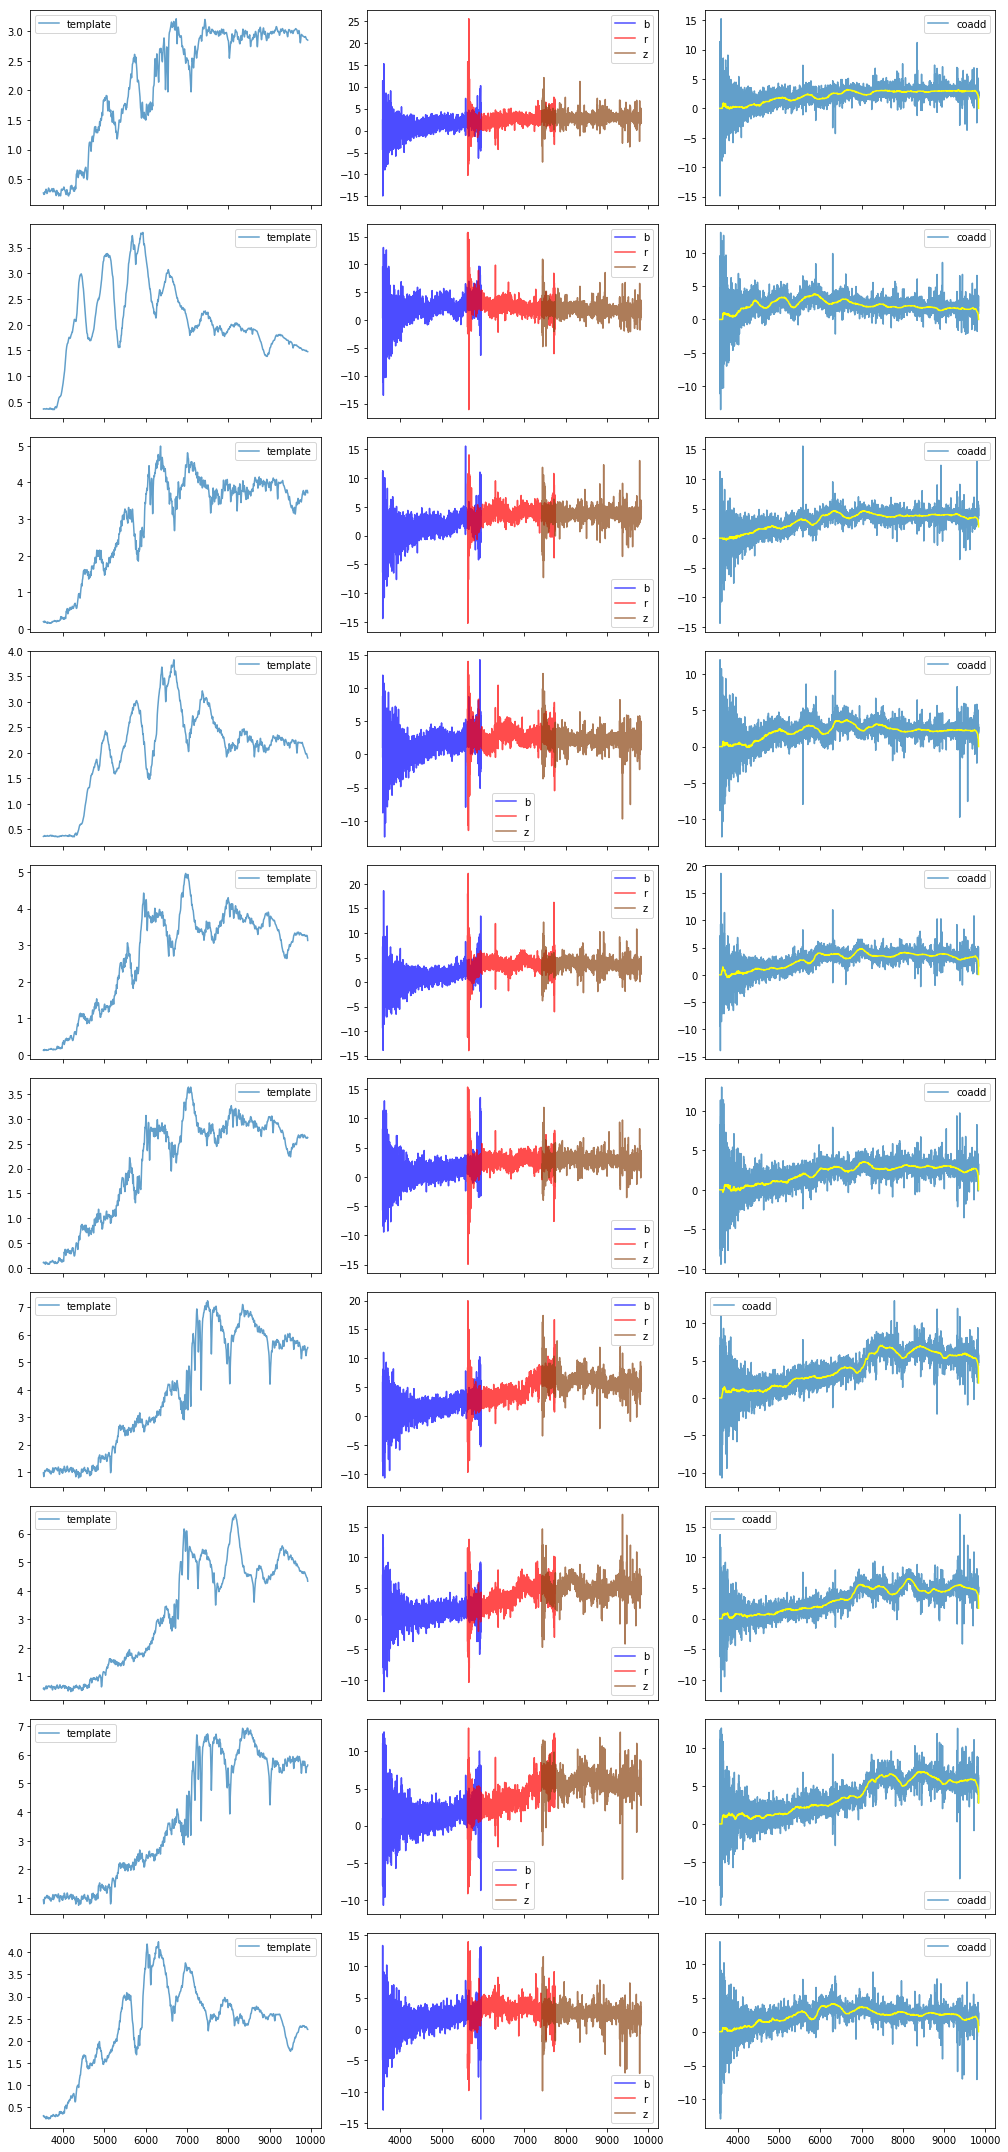

In [15]:
from scipy.signal import medfilt

fig, axes = plt.subplots(10,3, figsize=(14,30), sharex=True)
for i in range(10):
    axes[i,0].plot(wave, flux[i], alpha=0.7, label='template')
    axes[i,0].legend()
    
    for _filt, _col in zip(spectra.bands, ['b', 'r', 'saddlebrown']):
        wl = spectra.wave[_filt]
        fl = spectra.flux[_filt][i]
        axes[i,1].plot(wl, fl, color=_col, alpha=0.7, label=_filt)
    axes[i,1].legend()
    
    axes[i,2].plot(coadds.wave['brz'], coadds.flux['brz'][i], alpha=0.7, label='coadd')
    axes[i,2].plot(coadds.wave['brz'], medfilt(coadds.flux['brz'][i], 149), color='yellow')
    axes[i,2].legend()

fig.tight_layout();